# S&P 500 Analysis

In [476]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [477]:
# Define the start and end years (YYYY)
start_year = '2000'
end_year = '2025'

## Raw Data

In [478]:
daily_df = pd.read_csv("SPX_1927_2024.csv")
daily_df['Date'] = pd.to_datetime(daily_df['Date'], format='%d/%m/%Y')
display(daily_df)

,Date,Close,Open,High,Low
0,1927-12-30,17.66,17.66,17.66,17.66
1,1928-01-03,17.76,17.76,17.76,17.76
2,1928-01-04,17.72,17.72,17.72,17.72
3,1928-01-05,17.55,17.55,17.55,17.55
4,1928-01-06,17.66,17.66,17.66,17.66
...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98


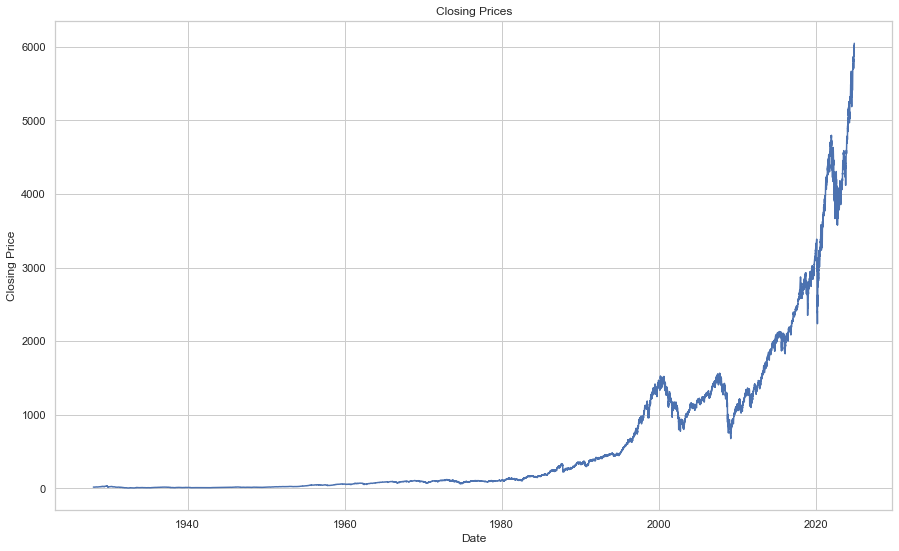

In [479]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,9))
sns.lineplot(data=daily_df, x="Date", y="Close")

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.show()

## Daily, Monthly and Yearly Charts

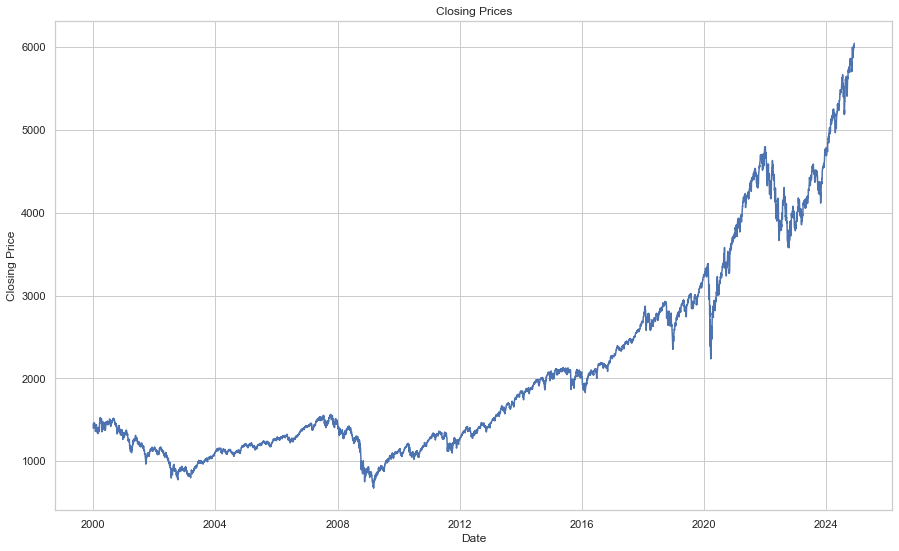

In [480]:
# Slice the DataFrame
daily_df = daily_df[(daily_df['Date'] >= start_year) & (daily_df['Date'] <= end_year)]

sns.set(style="whitegrid")

plt.figure(figsize=(15,9))
sns.lineplot(data=daily_df, x="Date", y="Close")

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.show()

In [481]:
display(daily_df)

,Date,Close,Open,High,Low
18078,2000-01-03,1455.22,1469.25,1478.00,1438.36
18079,2000-01-04,1399.42,1455.22,1455.22,1397.43
18080,2000-01-05,1402.11,1399.42,1413.27,1377.68
18081,2000-01-06,1403.45,1402.11,1411.90,1392.10
18082,2000-01-07,1441.47,1403.45,1441.47,1400.73
...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98


In [482]:
yearly_data = []
monthly_data = []

for year in range(int(start_year),int(end_year)):

    start_date = str(year) + '-01-01'
    end_date = str(year) + '-12-31'

    year_data_df = daily_df[(daily_df['Date'] >= start_date) & (daily_df['Date'] <= end_date)]

    y_open = year_data_df["Open"].iloc[0]
    y_close = year_data_df["Close"].iloc[-1]
    y_low = year_data_df["Low"].min()
    y_high = year_data_df["High"].max()

    yearly_data.append([year, y_close, y_open, y_high, y_low])

    for month in range(1,13):

        start_date = str(year) + "-" + str(month) + "-" + "01"
        end_date = str(year) + "-" + str(month + 1) + "-" + "01"
        if month + 1 == 13:
            end_date = str(year + 1) + "-" + "01" + "-" + "01"

        month_data_df = daily_df[(daily_df['Date'] >= start_date) & (daily_df['Date'] < end_date)]

        m_open = month_data_df["Open"].iloc[0]
        m_close = month_data_df["Close"].iloc[-1]
        m_low = month_data_df["Low"].min()
        m_high = month_data_df["High"].max()

        monthly_data.append([str(year) + "-" + str(month), m_close, m_open, m_high, m_low])


In [483]:
monthly_df = pd.DataFrame(data=monthly_data, columns=["Date", "Close", "Open", "High", "Low"])
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], format='%Y-%m')
display(monthly_df)

,Date,Close,Open,High,Low
0,2000-01-01,1394.46,1469.25,1478.00,1350.14
1,2000-02-01,1366.42,1394.46,1444.55,1325.07
2,2000-03-01,1498.58,1366.42,1552.87,1346.62
3,2000-04-01,1452.43,1498.58,1527.19,1339.40
4,2000-05-01,1420.60,1452.43,1481.51,1361.09
...,...,...,...,...,...
295,2024-08-01,5648.40,5537.84,5651.62,5119.26
296,2024-09-01,5762.48,5623.89,5767.37,5402.62
297,2024-10-01,5705.45,5757.73,5878.46,5674.00
298,2024-11-01,6032.38,5723.22,6044.17,5696.51


In [484]:
yearly_df = pd.DataFrame(data=yearly_data, columns=["Date", "Close", "Open", "High", "Low"])
yearly_df['Date'] = pd.to_datetime(yearly_df['Date'], format='%Y')
display(yearly_df)

,Date,Close,Open,High,Low
0,2000-01-01,1320.28,1469.25,1552.87,1254.07
1,2001-01-01,1148.08,1320.28,1383.37,944.75
2,2002-01-01,879.82,1148.08,1176.97,768.63
3,2003-01-01,1111.92,879.82,1112.56,788.90
4,2004-01-01,1211.92,1111.92,1217.33,1060.72
5,2005-01-01,1248.29,1211.92,1275.80,1136.15
6,2006-01-01,1418.30,1248.29,1431.81,1219.29
7,2007-01-01,1468.36,1418.03,1576.09,1363.98
8,2008-01-01,903.25,1467.97,1471.77,741.02
9,2009-01-01,1115.10,902.99,1130.38,666.79


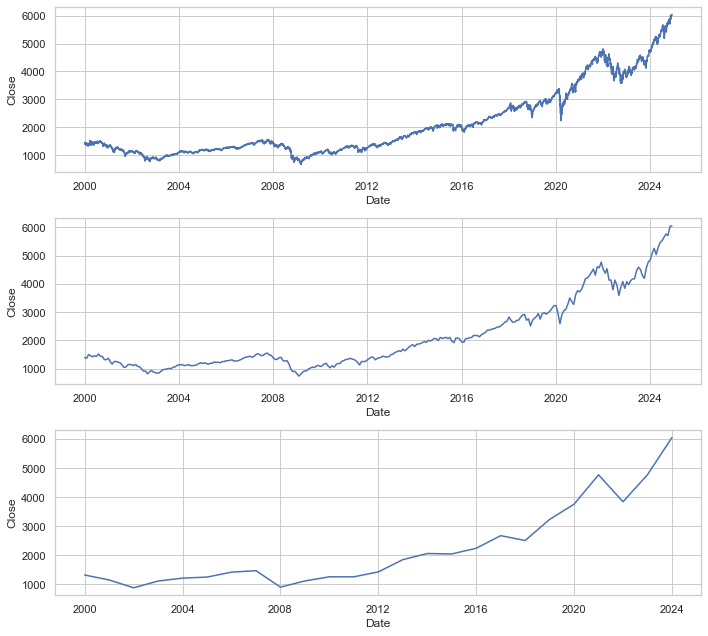

In [485]:
fig, axes = plt.subplots(3, 1, figsize=(10,9))

sns.lineplot(ax=axes[0], data=daily_df, x="Date", y="Close")
sns.lineplot(ax=axes[1], data=monthly_df, x="Date", y="Close")
sns.lineplot(ax=axes[2], data=yearly_df, x="Date", y="Close")
plt.tight_layout()

## Analysis

### Yearly

In [486]:
yearly_df["% Change"] = yearly_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(yearly_df)

,Date,Close,Open,High,Low,% Change
0,2000-01-01,1320.28,1469.25,1552.87,1254.07,-10.14
1,2001-01-01,1148.08,1320.28,1383.37,944.75,-13.04
2,2002-01-01,879.82,1148.08,1176.97,768.63,-23.37
3,2003-01-01,1111.92,879.82,1112.56,788.90,26.38
4,2004-01-01,1211.92,1111.92,1217.33,1060.72,8.99
5,2005-01-01,1248.29,1211.92,1275.80,1136.15,3.00
6,2006-01-01,1418.30,1248.29,1431.81,1219.29,13.62
7,2007-01-01,1468.36,1418.03,1576.09,1363.98,3.55
8,2008-01-01,903.25,1467.97,1471.77,741.02,-38.47
9,2009-01-01,1115.10,902.99,1130.38,666.79,23.49


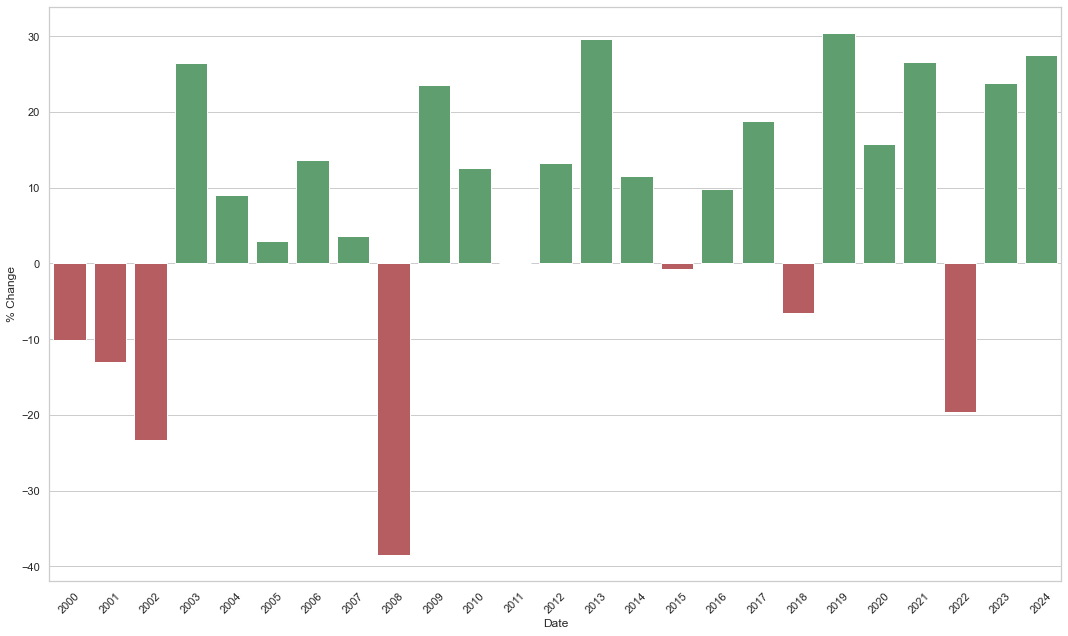

In [487]:
colors = ["g" if val >= 0 else "r" for val in yearly_df["% Change"]]

plt.figure(figsize=(15,9))
plt.xticks(rotation=45)
sns.barplot(data=yearly_df, x=yearly_df["Date"].dt.year, y="% Change", palette=colors)
plt.tight_layout()

In [488]:
yearly_df["% Change"].describe()

count    25.000000
mean      7.468800
std      18.101871
min     -38.470000
25%      -0.730000
50%      11.540000
75%      23.490000
max      30.430000
Name: % Change, dtype: float64

In [489]:
positive_years = yearly_df[(yearly_df['% Change'] >= 0)].shape[0]
negative_years = yearly_df[(yearly_df['% Change'] < 0)].shape[0]

pos_percent = round(positive_years/(positive_years + negative_years)*100, 2)
neg_percent = round(negative_years/(positive_years + negative_years)*100, 2)

print(f"Number of positive years in period: {positive_years} - Percentage of positive years: {pos_percent}%")
print(f"Number of negative years in period: {negative_years} - Percentage of negative years: {neg_percent}%")

Number of positive years in period: 18 - Percentage of positive years: 72.0%
Number of negative years in period: 7 - Percentage of negative years: 28.0%


<AxesSubplot:ylabel='% Change'>

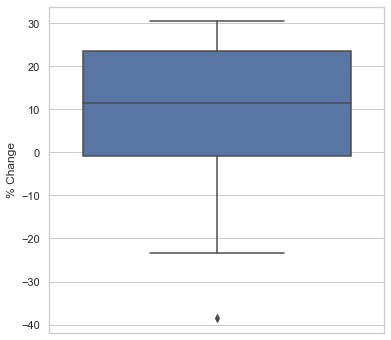

In [490]:
plt.figure(figsize=(6,6))
sns.boxplot(data=yearly_df, y="% Change")

In [491]:
years_change_distribution = []

## < -30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] < -30)].shape[0])
## -30% <= % Change < -20%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -30) & (yearly_df['% Change'] < -20)].shape[0])
## -20% <= % Change < -10%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -20) & (yearly_df['% Change'] < -10)].shape[0])
## -10% <= % Change < 0%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -10) & (yearly_df['% Change'] < 0)].shape[0])
## 0% <= % Change < 10%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 0) & (yearly_df['% Change'] < 10)].shape[0])
## 10% <= % Change < 20%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 10) & (yearly_df['% Change'] < 20)].shape[0])
## 20% <= % Change < 30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 20) & (yearly_df['% Change'] < 30)].shape[0])
## >= 30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 30)].shape[0])

In [492]:
years_change_distribution_df = pd.DataFrame(
    data={
        "% Change": ["< -30%", "-30% to -20%", "-20% to -10%", "-10% to 0%", "0% to 10%", "10% to 20%", "20% to 30%", ">= 30%"],
        "# Years": years_change_distribution
    }
)
display(years_change_distribution_df)

,% Change,# Years
0,< -30%,1
1,-30% to -20%,1
2,-20% to -10%,3
3,-10% to 0%,2
4,0% to 10%,5
5,10% to 20%,6
6,20% to 30%,6
7,>= 30%,1


<AxesSubplot:xlabel='% Change', ylabel='# Years'>

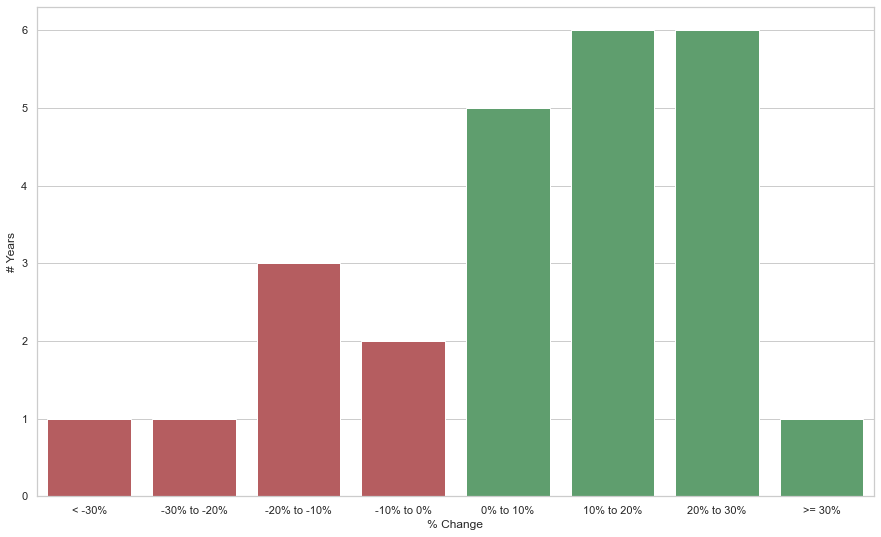

In [493]:
c1 = ["r" for i in range(4)]
c2 = ["g" for i in range(4)]
colors = c1 + c2

plt.figure(figsize=(15,9))
sns.barplot(data = years_change_distribution_df, x="% Change", y="# Years", palette=colors)

### Monthly

In [494]:
monthly_df["% Change"] = monthly_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(monthly_df)

,Date,Close,Open,High,Low,% Change
0,2000-01-01,1394.46,1469.25,1478.00,1350.14,-5.09
1,2000-02-01,1366.42,1394.46,1444.55,1325.07,-2.01
2,2000-03-01,1498.58,1366.42,1552.87,1346.62,9.67
3,2000-04-01,1452.43,1498.58,1527.19,1339.40,-3.08
4,2000-05-01,1420.60,1452.43,1481.51,1361.09,-2.19
...,...,...,...,...,...,...
295,2024-08-01,5648.40,5537.84,5651.62,5119.26,2.00
296,2024-09-01,5762.48,5623.89,5767.37,5402.62,2.46
297,2024-10-01,5705.45,5757.73,5878.46,5674.00,-0.91
298,2024-11-01,6032.38,5723.22,6044.17,5696.51,5.40


### Daily